In [1]:
%matplotlib inline

/home/ngc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.linalg import norm

In [3]:
from nba.ios import load_halo, load_snapshot, get_com

In [4]:
snapshot="/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110"
nhost=100000000
nsat=15000000


To load the DM particle of the host (by default galaxy=0) we use the load_halo function in nba 

In [ ]:
halo = load_halo(snapshot, N_halo_part=[nhost, nsat], q=['pos', 'vel', 'mass'], 
                 com_frame=0, galaxy=0, snapformat=3, com_method='diskpot')

* Loading snapshot: /home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110 
* Loading 'ParticleIDs' of particles types 'PartType1' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
Returning IDs for galaxy=0
100000000
* Loading 'Coordinates' of particles types 'PartType1' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading 'Velocities' of particles types 'PartType1' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading 'Masses' of particles types 'PartType1' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading halo 0 particle data
* Computing coordinates in halo 0 reference frame
* Loading 'Coordinates' of particles types 'PartType2' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading 'Velocities' of particles types 'PartType2' from snapshot: '/home/ngc/Work/research/data

In [5]:
satellite = load_halo(snapshot, N_halo_part=[nhost, nsat], q=['pos', 'vel', 'mass'], 
                      com_frame=0, galaxy=1, snapformat=3, com_method='shrinking')

* Loading snapshot: /home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110 
* Loading 'ParticleIDs' of particles types 'PartType1' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
Returning IDs for galaxy=1
15000000
* Loading 'Coordinates' of particles types 'PartType1' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading 'Velocities' of particles types 'PartType1' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading 'Masses' of particles types 'PartType1' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading halo 1 particle data
* Computing coordinates in halo 0 reference frame
Returning IDs for galaxy=1
15000000
* Loading 'Coordinates' of particles types 'PartType1' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading 'Velocities' of particles types 'PartType1' from snap

In [ ]:
plt.figure(figsize=(6,6))
Hh, xh, yh = np.histogram2d(halo['pos'][:,0], halo['pos'][:,1], bins=300)
plt.imshow(Hh.T, norm=LogNorm(), extent=[np.min(xh), np.max(xh), np.min(yh), np.max(yh)])
plt.show()

In [12]:
# Check array length
assert satellite['mass'].shape[0] == nsat, 'Length of galaxy array is different that input number of particles'

In [22]:
# radial cut
rsat = norm(satellite['pos'], axis=1)
rcut = np.where(rsat<300)[0]

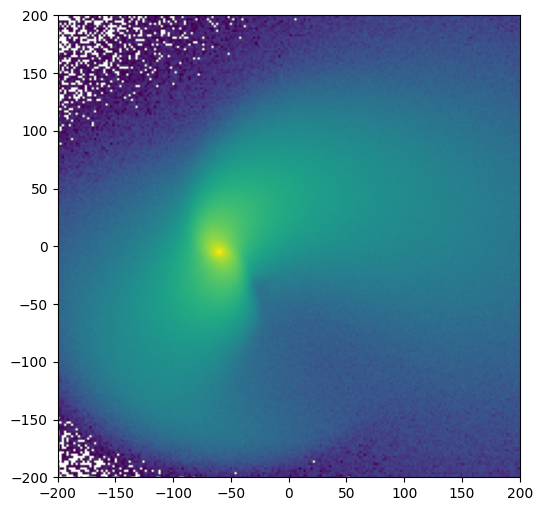

In [25]:
plt.figure(figsize=(6,6))
Hh, xh, yh = np.histogram2d(satellite['pos'][rcut,1], satellite['pos'][rcut,2], bins=300)
plt.imshow(Hh.T, norm=LogNorm(), extent=[np.min(xh), np.max(xh), np.min(yh), np.max(yh)])
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.show()